# Algorithms

## Cosine Similarity

In [1]:
import numpy as np
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler, StandardScaler
import pandas as pd

In [6]:
# 
rootKeyPhrases = [('word ', 7396),
                  ('keyphra ', 6724),
                  ('keyphra extract ', 4484),
                  ('document ', 4356),
                  ('candid word ', 3136),
                  ('unsupervi keyphra ', 2600),
                  ('posit ', 2500),
                  ('authorinput keyphra ', 2256),
                  ('dataset ', 1936),
                  ('page ', 1764),
                  ('perform baselin ', 1700),
                  ('target document ', 1640)
           ]
# 1887d7626acf9e277e5ef7657b796d637f11fcf9
Keyphrases = [('word ', 19044),
                  ('research paper use word ', 11536),
                  ('word graph ', 10920),
                  ('use word ', 6972),
                  ('paper use word ', 6696),
                  ('candid word ', 6320),
                  ('keyphra extract ', 6201),
                  ('keyphra ', 4761),
                  ('research paper use ', 3264),
                  ('extract ', 2304),
                  ('number ', 2116),
                  ('local context inform ', 2016)
      ]
#  26092619b8be8f0048172bb52bc07b36129b579e-pymupdf-clean
# Keyphrases = [('cite context ', 850), ('context ', 484),
#            ('document ', 196), ('paper ', 144), ('cite ', 144)]


In [11]:
df = pd.DataFrame(
    rootKeyPhrases, columns=['key_phrases', 'weight'])

# add paper_id column
df.insert(0, 'paper_id',[ 'b0d555a9ea67285fccd2ef8d887907bcc811f67a']*len(df))
df


,paper_id,key_phrases,weight
0,b0d555a9ea67285fccd2ef8d887907bcc811f67a,word,7396
1,b0d555a9ea67285fccd2ef8d887907bcc811f67a,keyphra,6724
2,b0d555a9ea67285fccd2ef8d887907bcc811f67a,keyphra extract,4484
3,b0d555a9ea67285fccd2ef8d887907bcc811f67a,document,4356
4,b0d555a9ea67285fccd2ef8d887907bcc811f67a,candid word,3136
5,b0d555a9ea67285fccd2ef8d887907bcc811f67a,unsupervi keyphra,2600
6,b0d555a9ea67285fccd2ef8d887907bcc811f67a,posit,2500
7,b0d555a9ea67285fccd2ef8d887907bcc811f67a,authorinput keyphra,2256
8,b0d555a9ea67285fccd2ef8d887907bcc811f67a,dataset,1936
9,b0d555a9ea67285fccd2ef8d887907bcc811f67a,page,1764


In [3]:
ROOT_WEIGHTED_KEY_PHRASES= []
PAPER_WEIGHTED_KEY_PHRASES = [0] * len(rootKeyPhrases)
for i in range(0, len(rootKeyPhrases)):
    ROOT_WEIGHTED_KEY_PHRASES.append(rootKeyPhrases[i][1])
ROOT_WEIGHTED_KEY_PHRASES,PAPER_WEIGHTED_KEY_PHRASES

([7396, 6724, 4484, 4356, 3136, 2600, 2500, 2256, 1936, 1764, 1700, 1640],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [6]:
for i in range(0, len(rootKeyPhrases)):
    for j in range(0, len(Keyphrases)):
        if rootKeyPhrases[i][0].strip() == Keyphrases[j][0].strip():
            #print(i)
            PAPER_WEIGHTED_KEY_PHRASES[i] = Keyphrases[j][1]
ROOT_WEIGHTED_KEY_PHRASES,PAPER_WEIGHTED_KEY_PHRASES

([7396, 6724, 4484, 4356, 3136, 2600, 2500, 2256, 1936, 1764, 1700, 1640],
 [19044, 4761, 6201, 0, 6320, 0, 0, 0, 0, 0, 0, 0])

In [7]:
ROOT_WEIGHTED_KEY_PHRASES = np.array(ROOT_WEIGHTED_KEY_PHRASES).reshape(-1, 1)
PAPER_WEIGHTED_KEY_PHRASES = np.array(
    PAPER_WEIGHTED_KEY_PHRASES).reshape(-1, 1)
ROOT_WEIGHTED_KEY_PHRASES,PAPER_WEIGHTED_KEY_PHRASES

(array([[7396],
        [6724],
        [4484],
        [4356],
        [3136],
        [2600],
        [2500],
        [2256],
        [1936],
        [1764],
        [1700],
        [1640]]),
 array([[19044],
        [ 4761],
        [ 6201],
        [    0],
        [ 6320],
        [    0],
        [    0],
        [    0],
        [    0],
        [    0],
        [    0],
        [    0]]))

In [8]:
mm = MinMaxScaler()
# mm.fit(ROOT_WEIGHTED_KEY_PHRASES)
ROOT_WEIGHTED_KEY_PHRASES_NORMS = mm.fit_transform(ROOT_WEIGHTED_KEY_PHRASES)
# mm.fit(PAPER_WEIGHTED_KEY_PHRASES)
PAPER_WEIGHTED_KEY_PHRASES_NORMS = mm.fit_transform(PAPER_WEIGHTED_KEY_PHRASES)
ROOT_WEIGHTED_KEY_PHRASES_NORMS,PAPER_WEIGHTED_KEY_PHRASES_NORMS

(array([[1.        ],
        [0.88325226],
        [0.49409312],
        [0.47185546],
        [0.25990271],
        [0.16678249],
        [0.14940931],
        [0.10701876],
        [0.0514246 ],
        [0.02154274],
        [0.01042391],
        [0.        ]]),
 array([[1.        ],
        [0.25      ],
        [0.32561437],
        [0.        ],
        [0.33186305],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]]))

In [135]:
t = np.array([1,2,3])
t

array([1, 2, 3])

In [89]:
t**2

array([1, 4, 9], dtype=int32)

In [99]:
np.sum(t**2)

14

In [9]:
np.sum(ROOT_WEIGHTED_KEY_PHRASES_NORMS**2),np.sum(PAPER_WEIGHTED_KEY_PHRASES_NORMS**2)

(2.3792693462808363, 1.2786578024178719)

In [10]:
np.sqrt(np.sum(ROOT_WEIGHTED_KEY_PHRASES_NORMS**2)) * \
    np.sqrt(np.sum(PAPER_WEIGHTED_KEY_PHRASES_NORMS**2))


1.744210799667191

In [11]:
np.dot(ROOT_WEIGHTED_KEY_PHRASES_NORMS.T, PAPER_WEIGHTED_KEY_PHRASES_NORMS)

array([[1.46794899]])

In [12]:
numerator = np.dot(ROOT_WEIGHTED_KEY_PHRASES_NORMS.T,
                 PAPER_WEIGHTED_KEY_PHRASES_NORMS)[0][0]
denominator = np.sqrt(np.sum(ROOT_WEIGHTED_KEY_PHRASES_NORMS**2)
                    ) * np.sqrt(np.sum(PAPER_WEIGHTED_KEY_PHRASES_NORMS**2))
# print(numNorm, denomNorm)
cosine_similarity = numerator / denominator
cosine_similarity

0.8416121437299021

## JaccardSimilarity

In [13]:
import numpy as np
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler, StandardScaler


In [14]:
#
rootKeyPhrases = [('word ', 7396),
                  ('keyphra ', 6724),
                  ('keyphra extract ', 4484),
                  ('document ', 4356),
                  ('candid word ', 3136),
                  ('unsupervi keyphra ', 2600),
                  ('posit ', 2500),
                  ('authorinput keyphra ', 2256),
                  ('dataset ', 1936),
                  ('page ', 1764),
                  ('perform baselin ', 1700),
                  ('target document ', 1640)
                  ]
# 1887d7626acf9e277e5ef7657b796d637f11fcf9
Keyphrases = [('word ', 19044),
              ('research paper use word ', 11536),
              ('word graph ', 10920),
              ('use word ', 6972),
              ('paper use word ', 6696),
              ('candid word ', 6320),
              ('keyphra extract ', 6201),
              ('keyphra ', 4761),
              ('research paper use ', 3264),
              ('extract ', 2304),
              ('number ', 2116),
              ('local context inform ', 2016)
              ]
#  26092619b8be8f0048172bb52bc07b36129b579e-pymupdf-clean
# Keyphrases = [('cite context ', 850), ('context ', 484),
#            ('document ', 196), ('paper ', 144), ('cite ', 144)]


In [15]:
INTERSECTION_COUNT = 0
for i in range(0, len(rootKeyPhrases)):
    for j in range(0, len(Keyphrases)):
        if rootKeyPhrases[i][0].strip() == Keyphrases[j][0].strip():
            INTERSECTION_COUNT += 1
INTERSECTION_COUNT


4

In [16]:
UNION_COUNT = len(rootKeyPhrases) + len(Keyphrases) - INTERSECTION_COUNT
UNION_COUNT


20

In [17]:
jaccard_similarity = INTERSECTION_COUNT / UNION_COUNT
jaccard_similarity


0.2

## Time - Aware InfluenceScore

In [1]:
from matplotlib_inline.backend_inline import set_matplotlib_formats
# set_matplotlib_formats('svg')
set_matplotlib_formats('png')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler, StandardScaler, RobustScaler
import matplotlib.pyplot as plt



### init


In [1]:
cols = ['uuid', 'paper_id', 'parent_id', 'title', 'reference_count',
        'citation_count', 'influential_citation_count', 'published_date',
        'paper_type']


In [4]:
# inf = pd.read_csv("data/info/info_full_ss_new.csv",usecols=cols)
inf = pd.read_csv("data/info/info_full_ss_new_x.csv")
inf.shape, inf.columns

((24387, 42),
 Index(['uuid', 'paper_id', 'parent_id', 'parent_paper_uuid', 'title',
        'reference_count', 'citation_count', 'influential_citation_count',
        'published_date', 'paper_type', 'venue', 'isOpenAccess', 'abstract',
        'paper_link', 'doi', 'download_link', 'tldl', 'embedding', 'age',
        'citation_count_min_max_norm', 'age_min_max_norm', 'degree_centrality',
        'closeness_centrality', 'betweenness_centrality', 'level_no',
        'similarity_with_l0', 'similarity_with_immediate_parent',
        'paper_type_label', 'path_from_root', 'similarity_with_l1',
        'similarity_with_l2', 'similarity_with_l0_em', 'similarity_with_l1_em',
        'similarity_with_l2_em', 'similarity_with_immediate_parent_em',
        'influence_score', 'in_deg_centrality', 'out_deg_centrality',
        'eigenvector_centrality', 'load_centrality',
        'citation_count_standard_norm', 'age_standard_norm'],
       dtype='object'))

In [4]:
inf.rename(columns={'parent_paper_id': 'parent_paper_uuid', 'freshness':'influence_score'}, inplace=True)


In [27]:
inf.to_csv("data/info/info_full_ss_new_x.csv", index=False)

In [23]:
def calculateTimeDiff(row):
	return 2017 - row['published_date']


inf['age'] = inf.apply(calculateTimeDiff, axis=1)
inf.head(n=2)

,uuid,paper_id,parent_id,title,reference_count,citation_count,influential_citation_count,published_date,paper_type,venue,isOpenAccess,abstract,paper_link,doi,download_link,tldl,embedding,age
0,8bde6cb8-296d-4593-883f-b768103e1e69,b0d555a9ea67285fccd2ef8d887907bcc811f67a,NaN,PositionRank: An Unsupervised Approach to Keyp...,43,176,26,2017.0,Article,ACL,True,The large and growing amounts of online schola...,https://www.semanticscholar.org/paper/b0d555a9...,https://doi.org/10.18653/v1%2FP17-1102,https://www.aclweb.org/anthology/P17-1102.pdf;...,tldr@v2.0.0:An unsupervised model for keyphras...,"specter@v0.1.1:-3.3292479515075684,-1.61703908...",0.0
1,ade6eb61-946a-49f3-835d-74804cb9de3e,03589e1917debe6df148cac8963fd008e4140237,8bde6cb8-296d-4593-883f-b768103e1e69,SemEval-2010 Task 5 : Automatic Keyphrase Extr...,29,352,71,2010.0,Unknown,*SEMEVAL,False,This paper describes Task 5 of the Workshop on...,https://www.semanticscholar.org/paper/03589e19...,NaN,https://www.aclweb.org/anthology/S10-1004.pdf;...,tldr@v2.0.0:The participating systems were eva...,"specter@v0.1.1:-5.0251593589782715,-0.76686722...",7.0


In [6]:
min_max = MinMaxScaler()
inf['citation_count_min_max_norm'] = min_max.fit_transform(
    inf['citation_count'].values.reshape(-1, 1))
inf['age_min_max_norm'] = min_max.fit_transform(
    inf['age'].values.reshape(-1, 1))
	
standard = StandardScaler()

inf['citation_count_standard_norm'] = standard.fit_transform(
    inf['citation_count'].values.reshape(-1, 1))
inf['age_standard_norm'] = standard.fit_transform(
    inf['age'].values.reshape(-1, 1))
inf.head(n=2)




,uuid,paper_id,parent_id,parent_paper_id,title,reference_count,citation_count,influential_citation_count,published_date,paper_type,...,similarity_with_l1_em,similarity_with_l2_em,similarity_with_immediate_parent_em,freshness,in_deg_centrality,out_deg_centrality,eigenvector_centrality,load_centrality,citation_count_standard_norm,age_standard_norm
0,8bde6cb8-296d-4593-883f-b768103e1e69,b0d555a9ea67285fccd2ef8d887907bcc811f67a,NaN,NaN,PositionRank: An Unsupervised Approach to Keyp...,43,176,26,2017.0,Article,...,NaN,NaN,NaN,NaN,0.000000,0.004205,2.168855e-26,0.000000,-0.155714,NaN
1,ade6eb61-946a-49f3-835d-74804cb9de3e,03589e1917debe6df148cac8963fd008e4140237,8bde6cb8-296d-4593-883f-b768103e1e69,b0d555a9ea67285fccd2ef8d887907bcc811f67a,SemEval-2010 Task 5 : Automatic Keyphrase Extr...,29,352,71,2010.0,NaN,...,NaN,NaN,0.665641,0.470477,0.002588,0.002156,3.035364e-18,0.000475,-0.138475,-1.257652


In [8]:
inf['age'].max()

165.0

In [9]:
inf[inf['age'] > 100].shape

(20, 42)

In [10]:
inf['age_min_max_norm'].max(), inf['citation_count_min_max_norm'].max()


(1.0, 1.0)

In [11]:
inf['age_min_max_norm'].min(), inf['citation_count_min_max_norm'].min()

(0.0, 0.0)

In [12]:
inf['citation_count_standard_norm'].max(), inf['age_standard_norm'].max()

(67.98266572864988, 12.404980037774575)

In [14]:
inf['citation_count_standard_norm'].min(), inf['age_standard_norm'].min()

(-0.1729529677063143, -1.7764862833019484)

In [13]:
inf[inf['uuid']=='7a07b2e5-7a2a-4ef5-8854-2af635473fc7']

,uuid,paper_id,parent_id,parent_paper_id,title,reference_count,citation_count,influential_citation_count,published_date,paper_type,...,download_link,tldl,embedding,age,citation_count_min_max_norm,age_min_max_norm,paper_type_label,freshness_a,freshness_b,freshness_avg
13605,7a07b2e5-7a2a-4ef5-8854-2af635473fc7,ca158d6ae27df41b135e3b56214c9bb4529128bb,b3531122-63a3-4314-bc4d-12d4f499e1ec,71e5a6c95ff476c303c3adeae0c1a4387485f733,APPL,0,140776,9446,2001.0,Article,...,https://sci.bban.top/pdf/10.1198/0003130017503...,tldr@v2.0.0:A prototype probability package na...,"specter@v0.1.1:-3.6148786544799805,-3.45355272...",16.0,0.202312,0.09697,1.0,0.069624,0.922514,0.496069


### InfluenceScore cal

In [15]:
c = .9
citation_count = 176
citation_count_min_max_norm = 0.000253
age = 0
age_min_max_norm = 0
# decay_rate = age_min_max_norm
decay_rate = np.exp(-(age_min_max_norm))
citation_remains_at_t = citation_count_min_max_norm * decay_rate
# citation_remains_at_t = citation_count_min_max_norm - citation_remains_at_t
citation_remains_at_t, (citation_remains_at_t + c) / (age + c)


(0.000253, 1.000281111111111)

In [123]:
citation_count = 140776
citation_count_min_max_norm = 0.202312
age = 16
age_min_max_norm = 0.09697
# decay_rate = age_min_max_norm
decay_rate = np.exp(-(age_min_max_norm))
citation_remains_at_t = citation_count_min_max_norm * decay_rate
# citation_remains_at_t = citation_count_min_max_norm - citation_remains_at_t
citation_remains_at_t, (citation_remains_at_t + c) / (age + c)

(0.18361497907958113, 0.06411922953133617)

In [15]:
# cbeb565b-c7fc-4d6b-9556-e6a4d61c415c
inf[inf['uuid']=='cbeb565b-c7fc-4d6b-9556-e6a4d61c415c']

,uuid,paper_id,parent_id,title,reference_count,citation_count,influential_citation_count,published_date,paper_type,venue,isOpenAccess,abstract,paper_link,doi,download_link,tldl,embedding,old,citation_count_scaled,old_scaled
7788,cbeb565b-c7fc-4d6b-9556-e6a4d61c415c,90006064cafcb0a9ad8a30cffeb56efe7e14129b,0721bd59-a7a5-4885-9925-d072319d2d41,"""J.""",0,695837,71952,1890.0,Unknown,The New Yale Book of Quotations,False,however (for it was the literal soul of the li...,https://www.semanticscholar.org/paper/90006064...,https://doi.org/10.1177/001452469000101110,https://sci.bban.top/pdf/10.1177/0014524690001...,NaN,"specter@v0.1.1:-3.9175853729248047,-1.47967934...",127.0,1.0,0.769697


In [88]:
.963/20

0.04815

In [121]:
1.0 * np.exp(-(0))


1.0

In [122]:
citation_count = 695837
citation_count_min_max_norm = 1.0
age = 127
age_min_max_norm = 0.769697
# decay_rate = age_min_max_norm
decay_rate =  np.exp(-(age_min_max_norm))
citation_remains_at_t = citation_count_min_max_norm * decay_rate
# citation_remains_at_t = citation_count_min_max_norm - citation_remains_at_t
citation_remains_at_t, (citation_remains_at_t + c) / (age + c)


(0.46315338252745664, 0.010657962334069246)

In [274]:
inf['paper_type'].unique()

array(['Article', 'Unknown', 'Conference Paper', 'Book', 'Chapter',
       'Literature Review'], dtype=object)

In [3]:
def labelEncoder(row):
	if row['paper_type'] == 'Article':
		return 1
	elif row['paper_type'] == 'Conference Paper':
		return .8
	elif row['paper_type'] == 'Book':
		return .6
	elif row['paper_type'] == 'Chapter':
		return .65
	elif row['paper_type'] == 'Literature Review':
		return .7
	else:
		return .76

In [4]:
inf['paper_type_label'] = inf.apply(labelEncoder, axis=1)
# inf.head(n=2)

### v1

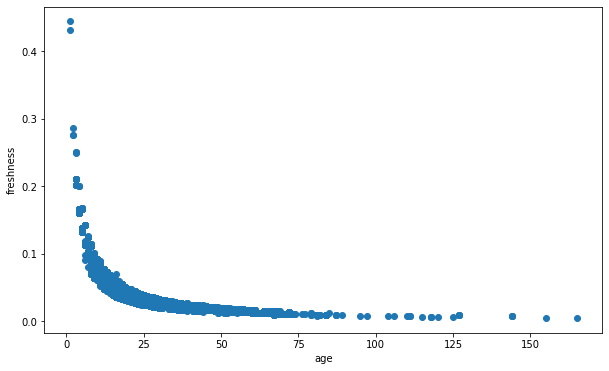

,uuid,paper_id,parent_id,parent_paper_id,title,reference_count,citation_count,influential_citation_count,published_date,paper_type,...,download_link,tldl,embedding,age,citation_count_min_max_norm,age_min_max_norm,paper_type_label,freshness_a,freshness_b,freshness_avg
0,ade6eb61-946a-49f3-835d-74804cb9de3e,03589e1917debe6df148cac8963fd008e4140237,8bde6cb8-296d-4593-883f-b768103e1e69,b0d555a9ea67285fccd2ef8d887907bcc811f67a,SemEval-2010 Task 5 : Automatic Keyphrase Extr...,29,352,71,2010.0,Unknown,...,https://www.aclweb.org/anthology/S10-1004.pdf;...,tldr@v2.0.0:The participating systems were eva...,"specter@v0.1.1:-5.0251593589782715,-0.76686722...",7.0,0.000506,0.042424,0.76,0.098001,0.958473,0.512602
1,be2af112-6c57-4598-9813-d02fff71055b,05dec9ff0f48f45b09245ba0354748961f18ff77,8bde6cb8-296d-4593-883f-b768103e1e69,b0d555a9ea67285fccd2ef8d887907bcc811f67a,Citation-Enhanced Keyphrase Extraction from Re...,61,100,10,2014.0,Conference Paper,...,https://www.aclweb.org/anthology/D14-1150.pdf;...,tldr@v2.0.0:Novel features based on citation n...,"specter@v0.1.1:-4.417524337768555,-1.956189870...",3.0,0.000144,0.018182,0.80,0.210563,0.981985,0.596274


In [21]:
# calculate InfluenceScore for each paper
# NUM: Nt= No.e^(-(y/t)) + c
# DENOM: age + c

def calculateFreshnessA(row):
	# 1-2.71828
	decay_rate = np.exp(-(row['age_min_max_norm']))
	citation_remains_at_t  = row['citation_count_min_max_norm'] * decay_rate
	# citation_remains_at_t = abs(row['citation_count_min_max_norm'] - citation_remains_at_t)
	numerator = citation_remains_at_t + row['paper_type_label']
	# denominator = row['age_min_max_norm'] +1 #+ row['paper_type_label']
	# + row['paper_type_label']
	denominator = row['age'] + row['paper_type_label']
	return (numerator / denominator)

inf['freshness_a'] = inf.apply(calculateFreshnessA, axis=1)
plt.figure(figsize=(10, 6))
plt.scatter(inf['age'], inf['freshness_a'])
plt.xlabel('age')
plt.ylabel('InfluenceScore')
plt.show()
inf.head(n=2)


In [9]:
down = inf[inf['citation_count'] < 10][:200]
down.shape


(200, 25)

In [10]:
up = inf[(inf['citation_count'] > 2000)# & (inf['citation_count'] < 2000)
         & (inf['age'] > 10)][:10]
up.shape

(10, 25)

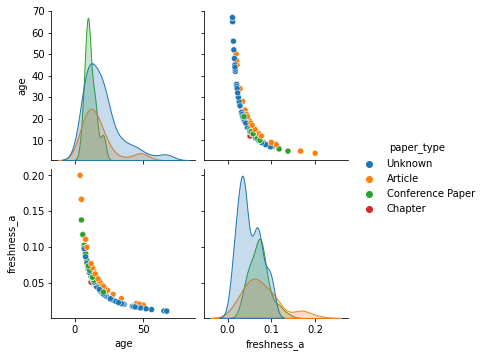

In [22]:
down = inf[inf['citation_count'] < 10][:200]
up = inf[(inf['citation_count'] > 2000)  # & (inf['citation_count'] < 2000)
         & (inf['age'] > 10)][:10]
data = down.append(up)
sns.pairplot(data, hue='paper_type', vars=[
             'age', 'freshness_a'])
plt.show()

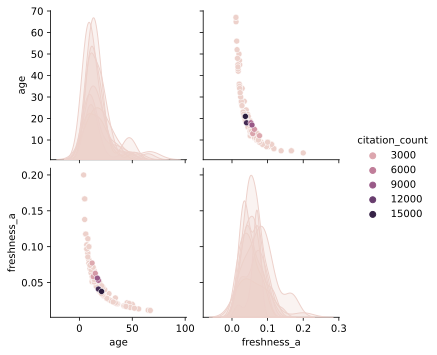

In [12]:
sns.pairplot(data, hue='citation_count', vars=[
             'age', 'freshness_a'])
plt.show()


In [23]:
# calculate InfluenceScore for each paper
def calculateFreshness(row):
	citation_count = row['citation_count_min_max_norm'] * row['paper_type_label']
	# InfluenceScore = np.exp(-((row['age_min_max_norm']**2) / (citation_count + 1)))
	InfluenceScore = np.exp(-((row['age_min_max_norm']) / (citation_count + 1)))

	return InfluenceScore
	# return numerator
	# return np.exp(-(denominator/numerator))


inf['freshness_b'] = inf.apply(calculateFreshness, axis=1)
inf.head(n=2)


,uuid,paper_id,parent_id,parent_paper_id,title,reference_count,citation_count,influential_citation_count,published_date,paper_type,...,download_link,tldl,embedding,age,citation_count_min_max_norm,age_min_max_norm,paper_type_label,freshness_a,freshness_b,freshness_avg
0,ade6eb61-946a-49f3-835d-74804cb9de3e,03589e1917debe6df148cac8963fd008e4140237,8bde6cb8-296d-4593-883f-b768103e1e69,b0d555a9ea67285fccd2ef8d887907bcc811f67a,SemEval-2010 Task 5 : Automatic Keyphrase Extr...,29,352,71,2010.0,Unknown,...,https://www.aclweb.org/anthology/S10-1004.pdf;...,tldr@v2.0.0:The participating systems were eva...,"specter@v0.1.1:-5.0251593589782715,-0.76686722...",7.0,0.000506,0.042424,0.76,0.098001,0.958479,0.512602
1,be2af112-6c57-4598-9813-d02fff71055b,05dec9ff0f48f45b09245ba0354748961f18ff77,8bde6cb8-296d-4593-883f-b768103e1e69,b0d555a9ea67285fccd2ef8d887907bcc811f67a,Citation-Enhanced Keyphrase Extraction from Re...,61,100,10,2014.0,Conference Paper,...,https://www.aclweb.org/anthology/D14-1150.pdf;...,tldr@v2.0.0:Novel features based on citation n...,"specter@v0.1.1:-4.417524337768555,-1.956189870...",3.0,0.000144,0.018182,0.80,0.210563,0.981985,0.596274


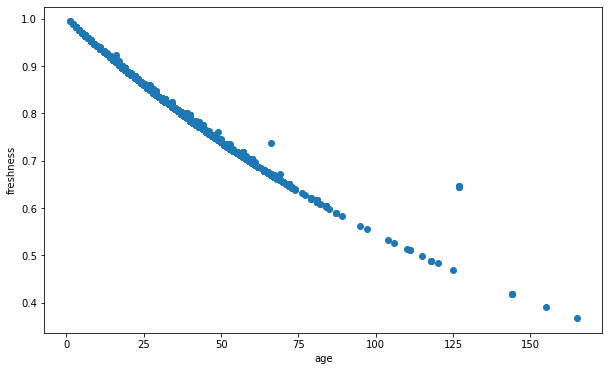

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(inf['age'], inf['freshness_b'])
plt.xlabel('age')
plt.ylabel('InfluenceScore')
plt.show()


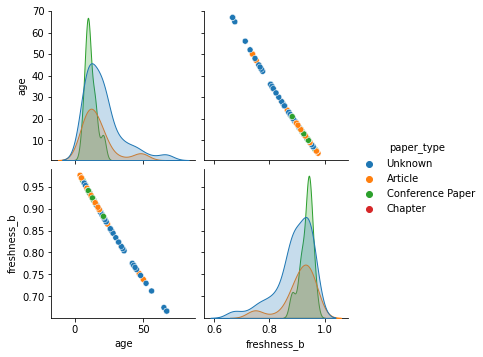

In [25]:
# pairplot
import seaborn as sns
down = inf[inf['citation_count'] < 10][:200]
up = inf[(inf['citation_count'] > 2000)  # & (inf['citation_count'] < 2000)
         & (inf['age'] > 10)][:10]
data = down.append(up)
sns.pairplot(data, hue='paper_type', vars=[
             'age', 'freshness_b'])
plt.show()

In [26]:
# average InfluenceScore for each paper
inf['freshness_avg'] = (inf['freshness_a'] + inf['freshness_b']) / 2
inf.head(n=1)

,uuid,paper_id,parent_id,parent_paper_id,title,reference_count,citation_count,influential_citation_count,published_date,paper_type,...,download_link,tldl,embedding,age,citation_count_min_max_norm,age_min_max_norm,paper_type_label,freshness_a,freshness_b,freshness_avg
0,ade6eb61-946a-49f3-835d-74804cb9de3e,03589e1917debe6df148cac8963fd008e4140237,8bde6cb8-296d-4593-883f-b768103e1e69,b0d555a9ea67285fccd2ef8d887907bcc811f67a,SemEval-2010 Task 5 : Automatic Keyphrase Extr...,29,352,71,2010.0,Unknown,...,https://www.aclweb.org/anthology/S10-1004.pdf;...,tldr@v2.0.0:The participating systems were eva...,"specter@v0.1.1:-5.0251593589782715,-0.76686722...",7.0,0.000506,0.042424,0.76,0.098001,0.958479,0.52824


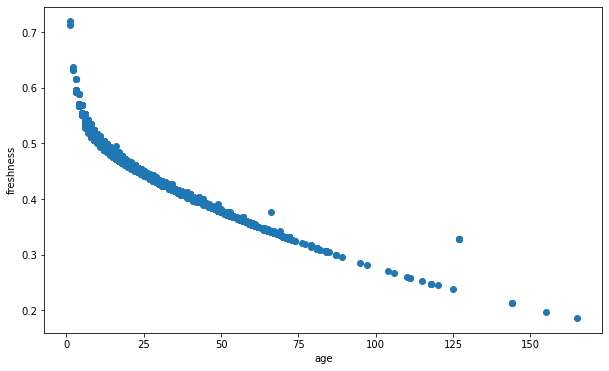

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(inf['age'], inf['freshness_avg'])
plt.xlabel('age')
plt.ylabel('InfluenceScore')
plt.show()

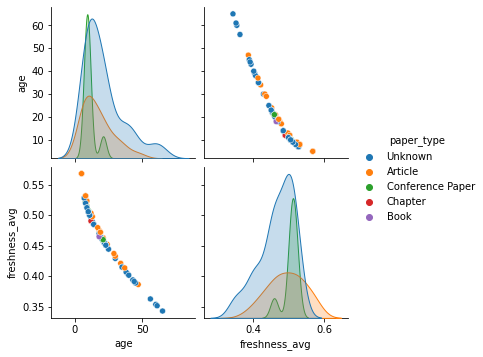

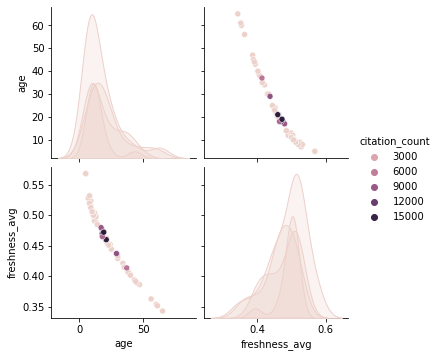

In [28]:
# pairplot
import seaborn as sns
down = inf[inf['citation_count'] < 5][:100]
up = inf[(inf['citation_count'] > 5000) #& (inf['citation_count'] < 1000)
         & (inf['age'] > 10)][:10]
data = down.append(up)
sns.pairplot(data, hue='paper_type', vars=[
             'age', 'freshness_avg'])
plt.show()
sns.pairplot(data, hue='citation_count', vars=[
             'age', 'freshness_avg'])
plt.show()


In [5]:
inf.to_csv('data/info/info_full_ss_new_x.csv', index=False)

### v2.1

$$
W(t_{p},t) = \frac{1}{1+\tau(t-t_{p})} \Rightarrow \frac{1}{1+\tau*(\frac{1}{citation_{norm}})*(t-t_{p})_{norm}}
$$

Text(0, 0.5, 'influence_score')

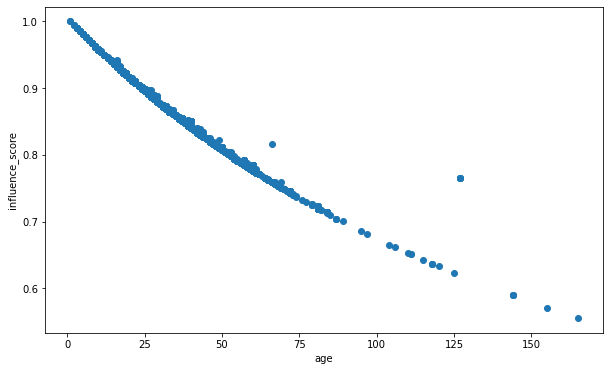

In [95]:
def calculateFreshness(row):
	_y = .8
	impact = row['citation_count_min_max_norm'] # * 0.42
	numerator  = 1
	denominator = 1 + (1 / (impact + 1)) * row['age_min_max_norm'] * _y
	return numerator / denominator
 

inf['influence_score'] = inf.apply(calculateFreshness, axis=1)
plt.figure(figsize=(10, 6))
plt.scatter(inf['age'], inf['influence_score'])
plt.xlabel('age')
plt.ylabel('influence_score')


Text(0, 0.5, 'influence_score')

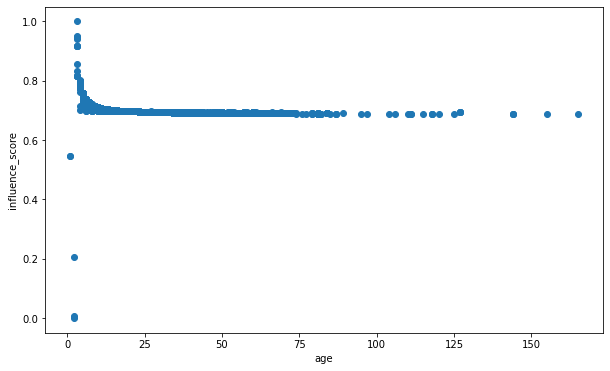

In [102]:
def calculateFreshness(row):
	_y = .5
	impact = row['citation_count_standard_norm']
	numerator = 1
	# denominator = 1 + (1 / (impact + 1)) * np.abs(row['age_standard_norm']) * _y
	denominator = 1 + (1 / (impact + 1)) * row['age_standard_norm'] * _y

	return numerator / denominator


inf['influence_score'] = inf.apply(calculateFreshness, axis=1)
min_max = MinMaxScaler()
inf['influence_score'] = min_max.fit_transform(
	inf['influence_score'].values.reshape(-1, 1))


plt.figure(figsize=(10, 6))
plt.scatter(inf['age'], inf['influence_score'])
plt.xlabel('age')
plt.ylabel('influence_score')


### v2.2 (used for final scoring matrices)

$$
W(t_{p},t) \propto citation^{'}\\
W(t_{p},t) \propto \frac{1}{(t-t_{p})^{'}}\\
W(t_{p},t) = \frac{1}{1+e^{\mu*(t-t_{p})}} \Rightarrow \frac{1}{1+e^{\mu*((t-t_{p})^{'})*\frac{1}{citation^{'}+1}}}
$$

- [https://datascience.stackexchange.com/questions/102625/is-standardization-normalization-a-good-way-of-reducing-the-impact-of-outliers-w](https://datascience.stackexchange.com/questions/102625/is-standardization-normalization-a-good-way-of-reducing-the-impact-of-outliers-w)

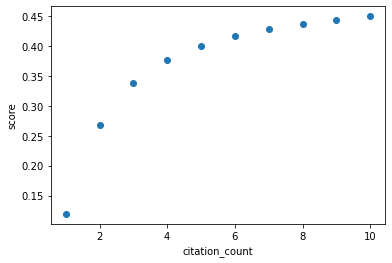

In [64]:
citation_count = np.arange(10) + 1
numerator = 1
age = 20
denominator = 1 + np.exp((1 / citation_count ) * age * .1)

score = numerator / denominator

plt.scatter(citation_count, score)
plt.xlabel('citation_count')
plt.ylabel('score')
plt.show()

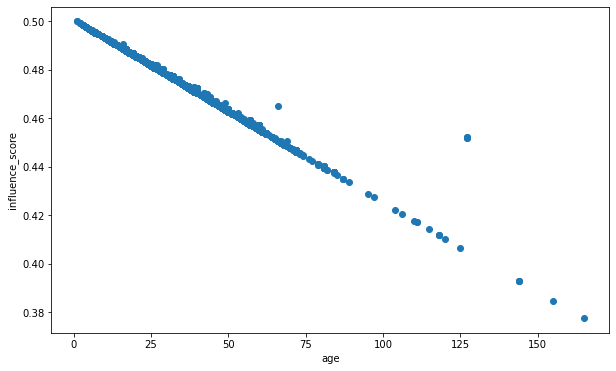

In [69]:
def calculateFreshness(row):
	_y = .5
	impact = row['citation_count_min_max_norm'] + 1
	numerator = 1
	denominator = 1 + np.exp(_y*(1/impact) * row['age_min_max_norm'])
	return numerator / denominator

inf['influence_score'] = inf.apply(calculateFreshness, axis=1)
plt.figure(figsize=(10, 6))
plt.scatter(inf['age'], inf['influence_score'])
plt.xlabel('age')
plt.ylabel('influence_score')
plt.show()

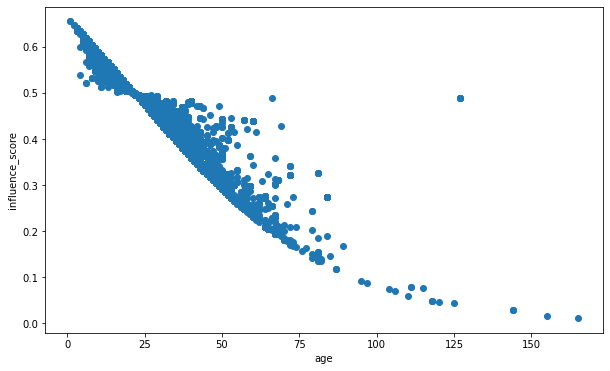

In [99]:

def calculateFreshness(row):
	_y = .3
	impact = row['citation_count_standard_norm'] + 1
	numerator = 1
	denominator = 1 + np.exp(_y*(1 / impact) * row['age_standard_norm'])
	return numerator / denominator


inf['influence_score'] = inf.apply(calculateFreshness, axis=1)
plt.figure(figsize=(10, 6))
plt.scatter(inf['age'], inf['influence_score'])
plt.xlabel('age')
plt.ylabel('influence_score')
plt.show()


In [39]:
inf[((inf['age']==40))&(inf['citation_count']>10000)].sort_values(by='influence_score',ascending=False)[:2][['age','influence_score','citation_count']]

,age,influence_score,citation_count
23760,40.0,0.469922,59190
16735,40.0,0.469884,59104


In [40]:
inf[(inf['age']==40)].sort_values(by='influence_score',ascending=True)[:2][['age','influence_score','citation_count']]

,age,influence_score,citation_count
8897,40.0,0.275956,2
21316,40.0,0.275979,3


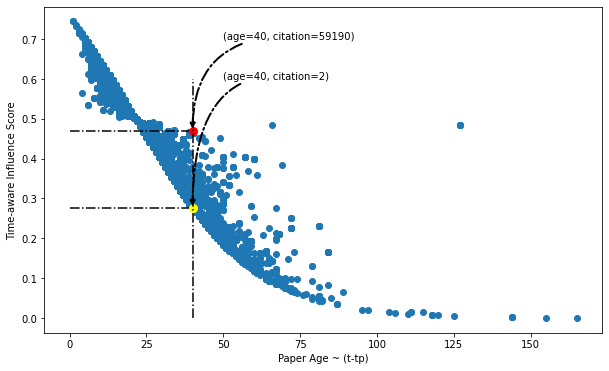

In [10]:
def calculateFreshness(row):
	_y = .5
	impact = row['citation_count_standard_norm'] + 1
	numerator = 1
	denominator = 1 + np.exp(_y * (1 / impact) * row['age_standard_norm'])
	return numerator / denominator


inf['influence_score'] = inf.apply(calculateFreshness, axis=1)
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(inf['age'], inf['influence_score'])
# ax.scatter(inf['age'], inf.apply(calculateFreshness, axis=1))
# plot([x1, x2], [y1, y2])
ax.annotate('(age=40, citation=59190)', xy=(40.0, 0.469922),
            xytext=(50, 0.7), arrowprops=dict(linestyle="-.", linewidth=2,
                                              arrowstyle="-|>",
                                              connectionstyle="angle3,angleA=0,angleB=90"))
#   
ax.plot([0, 40.0], [0.469922, 0.469922], linestyle="-.", color="black")
ax.plot([40.0], [0.469922], marker="o", markersize=8,
         markeredgecolor="red", markerfacecolor="red")

ax.annotate('(age=40, citation=2)', xy=(40.0, 0.275956),
            xytext=(50, 0.6), arrowprops=dict(linestyle="-.", linewidth=2,
                                              arrowstyle="-|>",
                                              connectionstyle="angle3,angleA=0,angleB=90"))
#   
ax.plot([0, 40.0], [0.275956, 0.275956], linestyle="-.", color="black")
ax.plot([40.0], [0.275956], marker="o", markersize=8,
        markeredgecolor="yellow", markerfacecolor="yellow")
# vertical line
ax.plot([40.0, 40.0], [0, .6], linestyle="-.", color="black")

plt.xlabel('Paper Age ~ (t-tp)')
plt.ylabel('Time-aware Influence Score')
plt.show()


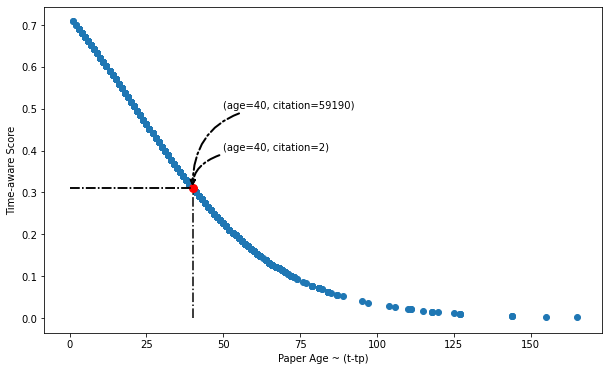

In [11]:
def calculateFreshness(row):
	_y = .5
	numerator = 1
	denominator = 1 + np.exp(_y * row['age_standard_norm'])
	return numerator / denominator


inf['influence_score'] = inf.apply(calculateFreshness, axis=1)
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(inf['age'], inf['influence_score'])
# ax.scatter(inf['age'], inf.apply(calculateFreshness, axis=1))
# plot([x1, x2], [y1, y2])
ax.annotate('(age=40, citation=59190)', xy=(40.0, 0.31046),
            xytext=(50, 0.5), arrowprops=dict(linestyle="-.", linewidth=2,
                                              arrowstyle="-|>",
                                              connectionstyle="angle3,angleA=0,angleB=90"))
#   
ax.plot([0, 40.0], [0.31046, 0.31046], linestyle="-.", color="black")
ax.plot([40.0], [0.31046], marker="o", markersize=8,
         markeredgecolor="red", markerfacecolor="red")

ax.annotate('(age=40, citation=2)', xy=(40.0, 0.31046),
            xytext=(50, 0.4), arrowprops=dict(linestyle="-.", linewidth=2,
                                              arrowstyle="-|>",
                                              connectionstyle="angle3,angleA=0,angleB=90"))
#   
ax.plot([0, 40.0], [0.31046, 0.31046], linestyle="-.", color="black")
# vertical line
ax.plot([40.0, 40.0], [0, .3], linestyle="-.", color="black")

plt.xlabel('Paper Age ~ (t-tp)')
plt.ylabel('Time-aware Score')
plt.show()


In [29]:
inf[((inf['age']==40))&(inf['citation_count']>10000)].sort_values(by='influence_score',ascending=False)[:2][['age','influence_score','citation_count']]

,age,influence_score,citation_count
641,40.0,0.31046,59083
2216,40.0,0.31046,59083


In [30]:
inf[(inf['age']==40)].sort_values(by='influence_score',ascending=True)[:2][['age','influence_score','citation_count']]

,age,influence_score,citation_count
381,40.0,0.31046,270
16338,40.0,0.31046,2495


### v2.3

$$
W(t_{p},t) \propto citation_{norm}\\
W(t_{p},t) \propto \frac{1}{t-t_{p}}\\
W(t_{p},t) = e^{-(\gamma*(t-t_{p}))} \Rightarrow e^{-(\gamma*(t-t_{p})*\frac{1}{(citation_{norm})+1})} 
$$

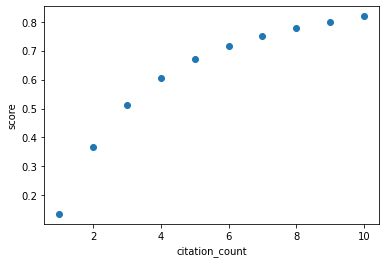

In [66]:
citation_count = np.arange(10) + 1
age=20
score = np.exp(-((1 / citation_count) * age * .1))

plt.scatter(citation_count, score)
plt.xlabel('citation_count')
plt.ylabel('score')
plt.show()


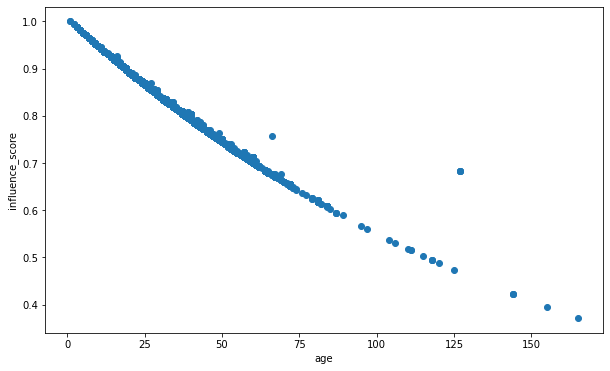

In [13]:
def calculateFreshness(row):
	_y = .99 # 0<=_y<=1
	impact = row['citation_count_min_max_norm'] + 1
	return np.exp(- (_y * (1 / impact) * row['age_min_max_norm']))


# inf['freshness_v23'] = inf.apply(calculateFreshness, axis=1)
# plt.scatter(inf['age'], inf['freshness_v23'] )

plt.figure(figsize=(10, 6))
plt.scatter(inf['age'], inf.apply(calculateFreshness, axis=1))
plt.xlabel('age')
plt.ylabel('influence_score')
plt.show()


In [59]:
inf[((inf['age']==40))&(inf['citation_count']>10000)].sort_values(by='influence_score',ascending=False)[:2][['age','influence_score','citation_count']]

,age,freshness_x,citation_count
23760,40.0,0.545057,59190
16735,40.0,0.545014,59104


In [60]:
inf[(inf['age']==40)].sort_values(by='freshness_x',ascending=True)[:2][['age','influence_score','citation_count']]

,age,freshness_x,citation_count
8897,40.0,0.352338,2
21316,40.0,0.352359,3


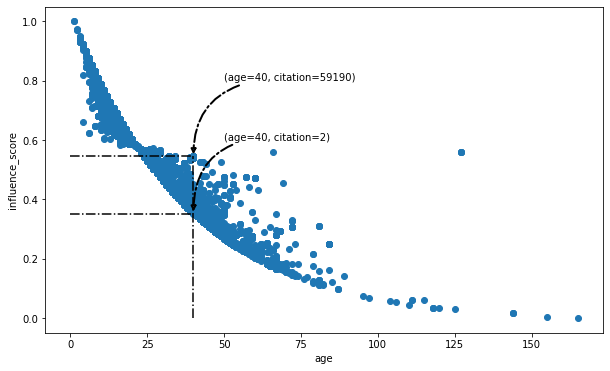

In [9]:
def calculateFreshness(row):
	_y = .25  # 0<=_y<=1
	impact = row['citation_count_standard_norm'] + 1
	return np.exp(- (_y * (1 / impact) * row['age_standard_norm']))


inf['influence_score'] = inf.apply(calculateFreshness, axis=1)
min_max = MinMaxScaler()
inf['influence_score'] = min_max.fit_transform(
	inf['influence_score'].values.reshape(-1, 1))
# plt.figure(figsize=(10, 6))
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(inf['age'], inf['influence_score'])
# ax.scatter(inf['age'], inf.apply(calculateFreshness, axis=1))
# plot([x1, x2], [y1, y2])
ax.annotate('(age=40, citation=59190)', xy=(40.0, 0.545057),
            xytext=(50, 0.8), arrowprops=dict(linestyle="-.", linewidth=2,
                                               arrowstyle="-|>",
                                               connectionstyle="angle3,angleA=0,angleB=90"))
ax.plot([0, 40.0], [0.545057, 0.545057], linestyle="-.",color="black")
ax.annotate('(age=40, citation=2)', xy=(40.0, 0.352338),
            xytext=(50, 0.6), arrowprops=dict(linestyle="-.", linewidth=2,
                                              arrowstyle="-|>",
                                              connectionstyle="angle3,angleA=0,angleB=90"))
ax.plot([0, 40.0], [0.352338, 0.352338], linestyle="-.", color="black")
ax.plot([40.0, 40.0], [0, 0.545057], linestyle="-.", color="black")

plt.xlabel('age')
plt.ylabel('influence_score')
plt.show()


In [69]:
inf[(inf['age']<20)].sort_values(by='citation_count_standard_norm',ascending=True)[:5][['age','freshness_x','citation_count','citation_count_standard_norm']]

,age,freshness_x,citation_count,citation_count_standard_norm
7963,10.0,0.789153,1,-0.172855
9202,14.0,0.709364,1,-0.172855
8932,10.0,0.789153,1,-0.172855
23576,10.0,0.789153,1,-0.172855
4929,10.0,0.789153,1,-0.172855


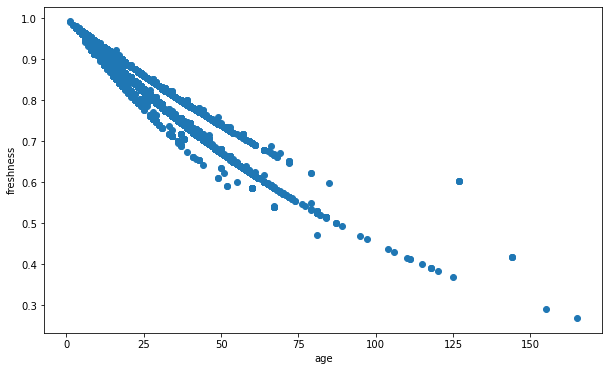

In [13]:
def calculateFreshness(row):
	impact =  row['citation_count_min_max_norm'] + 1
	return np.exp(- ((1 / (impact * row['paper_type_label'])) * row['age_min_max_norm']))


inf['freshness_v233'] = inf.apply(calculateFreshness, axis=1)
plt.figure(figsize=(10, 6))
plt.scatter(inf['age'], inf['freshness_v233'])
plt.xlabel('age')
plt.ylabel('InfluenceScore')
plt.show()


<Figure size 720x432 with 0 Axes>

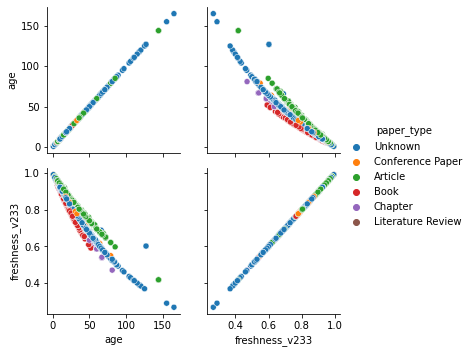

In [14]:
plt.figure(figsize=(10, 6))
g = sns.PairGrid(inf, hue='paper_type', vars=[
    'age', 'freshness_v233'])
g.map(sns.scatterplot)
g.add_legend()
plt.show()


<Figure size 720x432 with 0 Axes>

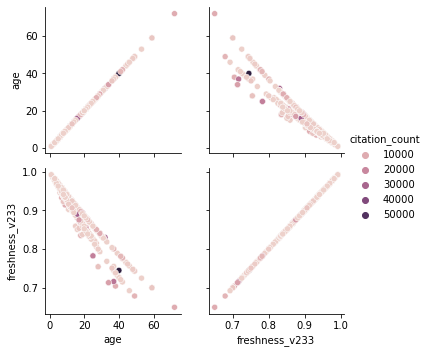

In [17]:
plt.figure(figsize=(10, 6))
g = sns.PairGrid(inf[:1000], 
                hue='citation_count',
                vars=['age', 'freshness_v233'])
g.map(sns.scatterplot)
g.add_legend()
plt.show()


### v2.4

`Ebbinghaus time-decay`:

$$
W(t_{p},t) =0.2 * e^{\frac{0.24}{(|t-t_{p}|+0.00255)^{0.225}}} \Rightarrow 0.2 * e^{\frac{0.24}{(\frac{|t-t_{p}|}{citation_{norm}}+0.00255)^{0.225}}}
$$

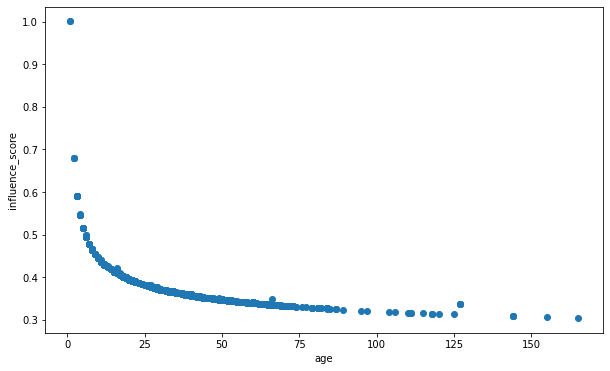

In [84]:
# age_min_max_norm
# citation_count_min_max_norm
# paper_type_label
def calculateFreshness(row):
	num = 0.42
	denom = (row['age_min_max_norm'] / (row['citation_count_min_max_norm'] + 1) + 0.00255)**0.225
	return 0.2 * np.exp(num/(denom) )


# inf['freshness_v24'] = inf.apply(calculateFreshness, axis=1)
inf['influence_score'] = inf.apply(calculateFreshness, axis=1)

plt.figure(figsize=(10, 6))
plt.scatter(inf['age'], inf['influence_score'])
plt.xlabel('age')
plt.ylabel('influence_score')
plt.show()


c:\Users\soiko\anaconda3\lib\site-packages\matplotlib\collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


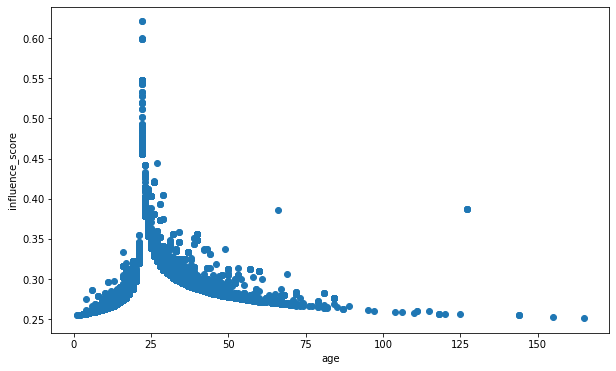

In [85]:
# age_min_max_norm
# citation_count_min_max_norm
# paper_type_label
def calculateFreshness(row):
	num = 0.42
	denom = (row['age_standard_norm'] /
	         (row['citation_count_standard_norm'] + 1) + 0.00255)**0.225
	return 0.2 * np.exp(num / (denom))


# inf['freshness_v24'] = inf.apply(calculateFreshness, axis=1)
inf['influence_score'] = inf.apply(calculateFreshness, axis=1)

plt.figure(figsize=(10, 6))
plt.scatter(inf['age'], inf['influence_score'])
plt.xlabel('age')
plt.ylabel('influence_score')
plt.show()
